In [1]:
!python -m pip install snap-stanford
!pip install ndlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 11.6 MB 4.0 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 110 kB 4.0 MB/s 
     |████████████████████████████████| 3.3 MB 15.9 MB/s 
  Created wheel for python-igraph: filename=python_igraph-0.10.2-py3-none-any.whl size=9074 sha256=cdb01627a3f62ee2de278246b9bfc8c055c523cb4ef309ff4b020ca5530f61c3
  Stored in directory: /root/.cache/pip/wheels/47/93/11/c7c992fab551e7a7fa504097aac4b992dac996aa1c81490afb
Successfully built python-igraph


In [2]:
import random
import matplotlib.pyplot as plt
import csv
from io import StringIO
import pandas as pd
from urllib.request import urlopen
import numpy as np 
import numpy as np
import networkx as nx

#facebook ego data
fe_edges = 'https://raw.githubusercontent.com/wang422003/Complex-Networks_exercise/main/Datasets/Group3/Facebook-Ego/348.edges'
FE_edges =pd.read_csv(fe_edges,delimiter=" ",names = ["Node1", "Node2"], encoding = "ISO-8859-1")

fe_feat= 'https://raw.githubusercontent.com/wang422003/Complex-Networks_exercise/main/Datasets/Group3/Facebook-Ego/348.feat'
FE_feat = pd.read_csv(fe_feat, delimiter=" ", encoding = "ISO-8859-1",header = None)

In [3]:
print(FE_feat)

     0    1    2    3    4    5    6    7    8    9    ...  152  153  154  \
0    349    0    0    0    0    0    0    0    0    0  ...    0    0    0   
1    350    0    0    0    0    0    0    1    0    0  ...    0    0    0   
2    351    0    0    0    1    0    0    0    0    0  ...    0    0    0   
3    352    0    0    0    0    0    0    0    0    0  ...    0    0    0   
4    353    0    0    0    0    0    0    0    0    1  ...    0    0    0   
..   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
145  492    0    0    0    0    0    0    0    0    0  ...    0    0    0   
146  493    0    0    0    0    0    0    0    1    0  ...    0    0    0   
147  494    0    0    0    0    0    0    0    0    0  ...    0    0    0   
148  495    0    0    0    0    0    0    0    0    0  ...    0    0    0   
149  496    0    0    0    0    0    0    0    0    0  ...    0    0    0   

     155  156  157  158  159  160  161  
0      0    0    0    0    0    0 

>Creating Facebook graph




In [4]:
FB_G = nx.Graph()
V = np.unique(FE_edges.values.flatten())
FB_G.add_nodes_from(V)
E = FE_edges.values
for e1,e2 in E:
  FB_G.add_edge(int(e1), int(e2)) 


# **assigment 9 **

---

We can predict links based on available features in the graph. Please randomly delete 10% of the
edges in the graph, and use any features to train a conventional machine learning algorithm to predict
the deleted edges. Please output a report of the prediction accuracy, AUROC, precision and ROC
curve.

In [5]:
def random_edge(G, p=0.10):
  edges = np.array(G.edges)
  edge_list = edges[np.random.choice(edges.shape[0], size=int(np.round(p*edges.shape[0])), replace=False), :]
  return edge_list.tolist()

edge_list = random_edge(FB_G, p=0.10)
print(f'{edge_list = }')
print(f'number of edges : {len(edge_list)}')

edge_list = [[372, 460], [367, 412], [388, 421], [463, 483], [395, 452], [428, 463], [434, 496], [400, 475], [363, 432], [378, 487], [389, 459], [369, 378], [474, 489], [402, 422], [397, 418], [388, 475], [400, 417], [407, 455], [367, 403], [198, 364], [363, 461], [363, 373], [432, 439], [366, 483], [392, 492], [408, 456], [373, 388], [376, 390], [456, 465], [395, 412], [438, 488], [391, 417], [474, 475], [483, 493], [404, 444], [413, 465], [373, 390], [376, 394], [363, 412], [415, 495], [412, 452], [419, 486], [392, 428], [402, 495], [422, 474], [373, 439], [373, 423], [376, 458], [359, 403], [404, 487], [402, 463], [440, 449], [417, 444], [428, 436], [361, 481], [417, 479], [445, 463], [404, 415], [439, 471], [409, 431], [359, 474], [368, 494], [444, 473], [436, 488], [436, 496], [473, 479], [414, 483], [402, 465], [387, 395], [452, 489], [437, 453], [388, 465], [439, 475], [461, 471], [376, 442], [363, 482], [438, 444], [391, 465], [355, 452], [387, 400], [391, 400], [456, 493], [42

In [6]:
def remove_edges(G, edge_list):
  """
  Remove edges from a graph G
  """
  G_temp = G.copy()
  G_temp.remove_edges_from(edge_list)
  return G_temp

# G_fb_nx_del is a graph with randomly deleted 10% of the edges from the Facebook graph FB_G
FB_G_del = remove_edges(FB_G, edge_list)
print(f'Before removing, number of edges : {len(FB_G.edges)}')
print(f'After removing , number of edges : {len(FB_G_del.edges)}')

Before removing, number of edges : 1248
After removing , number of edges : 1123


In [7]:
def link(G_complete, G):
  """
  Return a list of edges with 0 if the edges has been removed and 1 otherwise
  G_complete : a complete graph ased on all the nodes in G
  G : original graph
  """
  link = []
  for e in G_complete.edges:
    if e in G.edges:
      link.append([e[0], e[1], 1])
    else:
      link.append([e[0], e[1], 0])
  return link

data = link(nx.complete_graph(FB_G.nodes, nx.Graph()), FB_G_del)
data[:6]

[[34, 173, 0],
 [34, 198, 0],
 [34, 349, 0],
 [34, 350, 0],
 [34, 351, 0],
 [34, 352, 0]]

In [8]:
# training a machine learning algorithm using any features to predict the deleted edges
df_data = pd.DataFrame(data=data, columns  = ['Source', 'Target' , 'Link'])
df_data.head(6)

,Source,Target,Link
0,34,173,0
1,34,198,0
2,34,349,0
3,34,350,0
4,34,351,0
5,34,352,0


0    9755
1    1123
Name: Link, dtype: int64


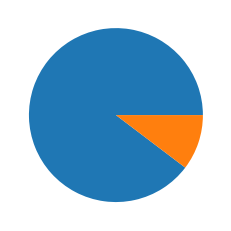

In [9]:
print(df_data['Link'].value_counts())
plt.pie(df_data['Link'].value_counts())
plt.show() 

1    1123
0    1123
Name: Link, dtype: int64


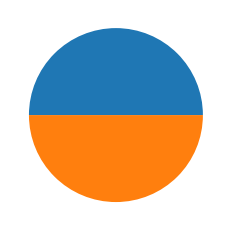

In [10]:
### Undersampling 
def undersample(df, col):
  minority = df[df[col]==1]
  majority = df[df[col]==0]
  majority = majority.sample(n=len(minority), random_state=101)
  df = pd.concat([minority,majority],axis=0)
  return df

df_data = undersample(df_data, 'Link')
print(df_data['Link'].value_counts())
plt.pie(df_data['Link'].value_counts())
plt.show() 

In [12]:
def feature_extraction(df, G, add_link = True) :
  """
  Expand the feature of the dataframe df using the different features we collect from the graph G
  """
  pr_dict = nx.pagerank(G)
  degCent = nx.degree_centrality(G)
  betCent = nx.betweenness_centrality(G, normalized=True, endpoints=True, k = 50)
    
  final_data_list = []

  for index, row in df.iterrows():
      src = row['Source']
      tgt = row['Target']
      
      data_list = []
      data_list.append(pr_dict[src])
      data_list.append(degCent[src])
      data_list.append(betCent[src])
      data_list.append(pr_dict[tgt])
      data_list.append(degCent[tgt])
      data_list.append(betCent[tgt])

      if add_link == True :
          data_list.append(row['Link'])
      
      final_data_list.append(data_list)

  if add_link == True :
      col_list = ['SrcPageRank', 'SrcDegCnt', 'SrcBetCnt', 'TgtPageRank', 'TgtDegCnt', 'TgtBetCnt', 'Link']
      new_df = pd.DataFrame(final_data_list, columns = col_list)        
  else :
      col_list = ['SrcPageRank', 'SrcDegCnt', 'SrcBetCnt', 'TgtPageRank', 'TgtDegCnt', 'TgtBetCnt']
      new_df = pd.DataFrame(final_data_list, columns = col_list)        
  return new_df
            
df_data_expand = feature_extraction(df_data, FB_G_del, add_link = True)
df_data_expand.head(6)

,SrcPageRank,SrcDegCnt,SrcBetCnt,TgtPageRank,TgtDegCnt,TgtBetCnt,Link
0,0.001668,0.013605,0.006122,0.010742,0.176871,0.058886,1
1,0.001668,0.013605,0.006122,0.014269,0.272109,0.042006,1
2,0.002962,0.020408,0.025104,0.010742,0.176871,0.058886,1
3,0.002962,0.020408,0.025104,0.004210,0.040816,0.031987,1
4,0.002962,0.020408,0.025104,0.003533,0.020408,0.008388,1
5,0.008195,0.034014,0.001565,0.006140,0.020408,0.000844,1


In [13]:
# splitting the data into train and val set
from sklearn.model_selection import train_test_split 
X = df_data_expand.drop('Link', axis =1)
y = df_data_expand['Link']
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size = 0.2, random_state = 0) 
print(X_train.shape)
print(X_test.shape)

(1796, 6)
(450, 6)


In [14]:
# training
from sklearn.ensemble import GradientBoostingClassifier  
import xgboost
#classifier = GradientBoostingClassifier()  
#classifier = xgboost.XGBClassifier()
from lightgbm import LGBMClassifier
classifier = LGBMClassifier(
            nthread=4,
            n_estimators=10000,
            learning_rate=0.02,
            num_leaves=34,
            colsample_bytree=0.9497036,
            subsample=0.8715623,
            max_depth=8,
            reg_alpha=0.041545473,
            reg_lambda=0.0735294,
            min_split_gain=0.0222415,
            min_child_weight=39.3259775,
            silent=-1,
            verbose=-1 )


#classifier.fit(X_train, y_train) 
classifier.fit(X_train, y_train )

y_train_pred = classifier.predict(X_train)
y_test_pred = classifier.predict(X_test) 

In [15]:
# confusion matrix
from sklearn.metrics import classification_report, confusion_matrix
print('Confusion Matrix on Train Data\n',confusion_matrix(y_train, y_train_pred))
print('Confusion Matrix on Test Data\n',confusion_matrix(y_test, y_test_pred))


Confusion Matrix on Train Data
 [[772 133]
 [127 764]]
Confusion Matrix on Test Data
 [[160  58]
 [ 49 183]]


In [16]:
# accuracy
from sklearn.metrics import accuracy_score
train_acc = accuracy_score(y_train,y_train_pred)
test_acc = accuracy_score(y_test,y_test_pred)
print(f'{train_acc=}')
print(f'{test_acc=}')

train_acc=0.8552338530066815
test_acc=0.7622222222222222


In [17]:
# precision
from sklearn.metrics import precision_score
train_prec = precision_score(y_train,y_train_pred)
test_prec = precision_score(y_test,y_test_pred)
print(f'{train_prec=}')
print(f'{test_prec=}')


train_prec=0.8517279821627648
test_prec=0.7593360995850622


In [18]:
# AUROC 
from sklearn.metrics import roc_auc_score
train_auc = roc_auc_score(y_train,y_train_pred)
test_auc = roc_auc_score(y_test,y_test_pred)
print(f'{train_auc=}')
print(f'{test_auc=}')

train_auc=0.85525109908167
test_auc=0.7613690287883582


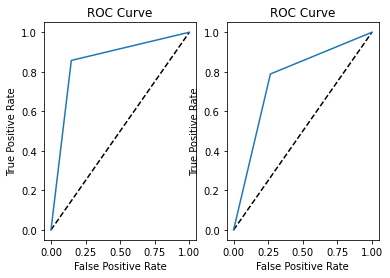

In [19]:
# ROCcurve
def plot_roc_curve(fpr, tpr):
  """
  Plot ROC curve
  """
  plt.plot([0, 1], [0, 1], 'k--')
  plt.plot(fpr, tpr)
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('ROC Curve')

from sklearn.metrics import roc_curve
train_fpr, train_tpr, thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, thresholds = roc_curve(y_test, y_test_pred)

plt.subplot(121)
plot_roc_curve(train_fpr, train_tpr)
plt.subplot(122)
plot_roc_curve(test_fpr, test_tpr)
plt.show()


In [20]:
# the deleted edges
print(edge_list)

[[372, 460], [367, 412], [388, 421], [463, 483], [395, 452], [428, 463], [434, 496], [400, 475], [363, 432], [378, 487], [389, 459], [369, 378], [474, 489], [402, 422], [397, 418], [388, 475], [400, 417], [407, 455], [367, 403], [198, 364], [363, 461], [363, 373], [432, 439], [366, 483], [392, 492], [408, 456], [373, 388], [376, 390], [456, 465], [395, 412], [438, 488], [391, 417], [474, 475], [483, 493], [404, 444], [413, 465], [373, 390], [376, 394], [363, 412], [415, 495], [412, 452], [419, 486], [392, 428], [402, 495], [422, 474], [373, 439], [373, 423], [376, 458], [359, 403], [404, 487], [402, 463], [440, 449], [417, 444], [428, 436], [361, 481], [417, 479], [445, 463], [404, 415], [439, 471], [409, 431], [359, 474], [368, 494], [444, 473], [436, 488], [436, 496], [473, 479], [414, 483], [402, 465], [387, 395], [452, 489], [437, 453], [388, 465], [439, 475], [461, 471], [376, 442], [363, 482], [438, 444], [391, 465], [355, 452], [387, 400], [391, 400], [456, 493], [428, 473], [37

In [21]:
df_data_test = pd.DataFrame(data=edge_list, columns  = ['Source', 'Target'])
df_data_test.head(6)

,Source,Target
0,372,460
1,367,412
2,388,421
3,463,483
4,395,452
5,428,463


In [23]:
df_data_test_expand = feature_extraction(df_data_test, FB_G_del, add_link = False)
df_data_test_expand.head(6)

,SrcPageRank,SrcDegCnt,SrcBetCnt,TgtPageRank,TgtDegCnt,TgtBetCnt
0,0.003705,0.040816,0.012031,0.013381,0.251701,0.040157
1,0.006982,0.115646,0.028654,0.015743,0.312925,0.069293
2,0.007254,0.136054,0.028780,0.005927,0.095238,0.040328
3,0.009826,0.163265,0.028900,0.013543,0.272109,0.045685
4,0.011692,0.231293,0.037674,0.007807,0.136054,0.030237
5,0.014269,0.272109,0.045941,0.009826,0.163265,0.028900


In [24]:
y_pred = classifier.predict(df_data_test_expand)
y_true = np.ones(len(y_pred), dtype=int)

In [25]:
# confusion matrix
from sklearn.metrics import classification_report, confusion_matrix
print('Confusion Matrix \n',confusion_matrix(y_true, y_pred))

Confusion Matrix 
 [[ 0  0]
 [27 98]]


In [26]:
# accuracy
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_true, y_pred)
print(f'{acc=}')

acc=0.784


In [27]:
# precision
from sklearn.metrics import precision_score
prec = precision_score(y_true, y_pred)
print(f'{prec=}')

prec=1.0


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_ranking.py:990: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  warnings.warn(


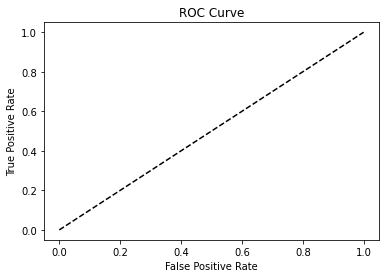

In [29]:
# ROCcurve
def plot_roc_curve(fpr, tpr):
  """
  Plot ROC curve
  """
  plt.plot([0, 1], [0, 1], 'k--')
  plt.plot(fpr, tpr)
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('ROC Curve')

from sklearn.metrics import roc_curve
train_fpr, train_tpr, thresholds = roc_curve(y_true, y_pred)

plot_roc_curve(train_fpr, train_tpr)
plt.show()

# This metric does not give us much information cause only one class present in y_true.